<a href="https://colab.research.google.com/github/SilentGee03/Anal-tica-de-Datos-y-Herramientas-de-Inteligencia-Artificial-II/blob/main/Airbnb_Bases/Seattle/Regresi%C3%B3n%20Lineal/Private_Room.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [306]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [307]:
df = pd.read_csv("Seattle_Outliers_categorizacion.csv")
df.drop("Unnamed: 0", axis = 1, inplace = True)
df.head(6)

,last_scraped,source,host_name,host_response_time,host_verifications,neighbourhood_cleansed,property_type,room_type,bathrooms_text,amenities,...,hostAcceptanceCat,hostVerifCat,neighbourhood_Category_num,bedsCategory,reviewsMonthCat,reviewScoresCat,reviewLocationCat,reviewRatingCat,reviewCleanCat,reviewCommunicationCat
0,24/06/2024,city scrape,Joyce,within a few hours,"['email', 'phone']",Wallingford,Entire guesthouse,Entire home/apt,1 bath,"[""Keypad"", ""Refrigerator"", ""Patio or balcony"",...",...,(37 - 45%) Medio,(2) Verificación moderada,2,(0 - 1) Una cama,(0) Sin reseñas,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho
1,24/06/2024,city scrape,Angielena,within a few hours,"['email', 'phone']",Georgetown,Private room in rental unit,Private room,3 shared baths,"[""Rice maker"", ""Shared patio or balcony"", ""Ref...",...,(92 - 100%) Excelente,(2) Verificación moderada,4,(0 - 1) Una cama,(1) Reseña mensual mínima,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho
2,24/06/2024,city scrape,Cassie,within a few hours,"['email', 'phone']",Fairmount Park,Entire home,Entire home/apt,1 bath,"[""Single level home"", ""Refrigerator"", ""Luggage...",...,(74 - 82%) Muy bueno,(2) Verificación moderada,4,(2) Pocas camas,(0) Sin reseñas,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho
3,24/06/2024,city scrape,Cassie,within a few hours,"['email', 'phone']",Fairmount Park,Entire guest suite,Entire home/apt,1 bath,"[""Single level home"", ""Refrigerator"", ""Luggage...",...,(74 - 82%) Muy bueno,(2) Verificación moderada,4,(2) Pocas camas,(0) Sin reseñas,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho
4,25/06/2024,previous scrape,Joyce,within a few hours,"['email', 'phone']",Wallingford,Entire rental unit,Entire home/apt,1 bath,"[""Smart lock"", ""Refrigerator"", ""Patio or balco...",...,(37 - 45%) Medio,(2) Verificación moderada,2,(2) Pocas camas,(0) Sin reseñas,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho,(4) Satisfecho,(5) Muy satisfecho
5,24/06/2024,city scrape,Amanda,within an hour,"['email', 'phone']",Whittier Heights,Entire guest suite,Entire home/apt,1 bath,"[""Luggage dropoff allowed"", ""Refrigerator"", ""S...",...,(92 - 100%) Excelente,(2) Verificación moderada,3,(2) Pocas camas,(5 - 7) Buen número de reseñas mensuales,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho


In [308]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6442 entries, 0 to 6441
Data columns (total 74 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   last_scraped                    6442 non-null   object 
 1   source                          6442 non-null   object 
 2   host_name                       6442 non-null   object 
 3   host_response_time              6442 non-null   object 
 4   host_verifications              6442 non-null   object 
 5   neighbourhood_cleansed          6442 non-null   object 
 6   property_type                   6442 non-null   object 
 7   room_type                       6442 non-null   object 
 8   bathrooms_text                  6442 non-null   object 
 9   amenities                       6442 non-null   object 
 10  calendar_last_scraped           6442 non-null   object 
 11  host_id                         6442 non-null   int64  
 12  host_since                      64

In [309]:
# Conteo de los tipos de habitaciones
df[["room_type","room_type_num"]].value_counts()

,,count
room_type,room_type_num,
Entire home/apt,0,5387
Private room,2,1024
Hotel room,1,21
Shared room,3,10


In [310]:
# Fragmentamos el dataframe solo con las variables a analizar
df2 = df[["room_type_num","host_acceptance_rate","host_response_rate","review_scores_location","review_scores_cleanliness",
          "price","availability_365", "number_of_reviews", "reviews_per_month","review_scores_communication","number_of_reviews_ltm"]]

In [311]:
df2["review_scores_location"]

,review_scores_location
0,5.0
1,5.0
2,5.0
3,5.0
4,5.0
...,...
6437,5.0
6438,5.0
6439,5.0
6440,5.0


In [312]:
# Corroboramos
df2["room_type_num"].value_counts()

,count
room_type_num,
0,5387
2,1024
1,21
3,10


## Dividir el DataFrame según el tipo de habitación
## Private Room | 2

In [313]:
dfHome2 = df2[df2["room_type_num"] == 2]
dfHome2

,room_type_num,host_acceptance_rate,host_response_rate,review_scores_location,review_scores_cleanliness,price,availability_365,number_of_reviews,reviews_per_month,review_scores_communication,number_of_reviews_ltm
1,2,98.0,98.0,5.0,5.0,76.0,337,196.0,1.16,5.0,15
9,2,100.0,100.0,5.0,5.0,52.0,43,76.0,0.62,5.0,1
10,2,97.0,100.0,5.0,5.0,67.0,235,377.0,2.45,5.0,46
11,2,98.0,98.0,5.0,5.0,69.0,334,278.0,1.81,5.0,28
24,2,98.0,100.0,5.0,5.0,144.0,94,63.0,5.76,5.0,44
...,...,...,...,...,...,...,...,...,...,...,...
6424,2,100.0,100.0,5.0,5.0,68.0,53,0.0,1.78,5.0,0
6425,2,100.0,100.0,5.0,5.0,55.0,244,0.0,1.78,5.0,0
6436,2,98.0,100.0,5.0,5.0,59.0,88,0.0,1.78,5.0,0
6438,2,99.0,100.0,5.0,5.0,82.0,26,0.0,1.78,5.0,0


## Filtro: “host_acceptance_rate vs host_response_rate”

<Axes: xlabel='host_response_rate', ylabel='host_acceptance_rate'>

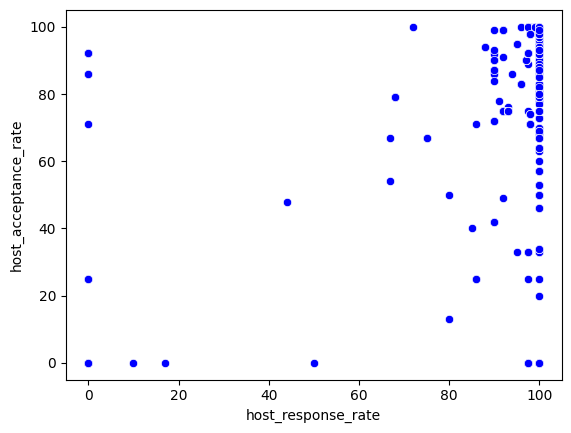

In [314]:
# Imprimimos el scatterplot entre la variable dependiente e independiente
from turtle import color

sns.scatterplot(x = 'host_response_rate', y = 'host_acceptance_rate', color = 'blue', data = dfHome2)

In [315]:
# Declaramos las variables dependientes e independientes de la regresión lineal
Vars_Indep = dfHome2[["host_response_rate"]] # Independiente = x
Var_Dep = dfHome2[["host_acceptance_rate"]] # Dependiente = y

In [316]:
# Se define model con la función de regresión Lineal
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [317]:
# Ajustamos el modelo con las variables declaradas
model.fit(X = Vars_Indep, y = Var_Dep)

LinearRegression()

In [318]:
# Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_response_rate'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([[0.56084698]]),
 'rank_': 1,
 'singular_': array([502.90974335]),
 'intercept_': array([33.68465056])}

## Modelo matemático: y = 0.56084698x + 33.68465056

In [319]:
# Predecimos los valores de "host_response_rate" a partir de la variable "host_acceptance_rate"
y_pred = model.predict(X = dfHome2[['host_response_rate']])
y_pred

array([[88.64765495],
       [89.76934892],
       [89.76934892],
       ...,
       [89.76934892],
       [89.76934892],
       [74.06563338]])

In [320]:
# Insertamos la columna de predicciones en el df
dfHome2.insert(2, 'Predict1', y_pred)
dfHome2

,room_type_num,host_acceptance_rate,Predict1,host_response_rate,review_scores_location,review_scores_cleanliness,price,availability_365,number_of_reviews,reviews_per_month,review_scores_communication,number_of_reviews_ltm
1,2,98.0,88.647655,98.0,5.0,5.0,76.0,337,196.0,1.16,5.0,15
9,2,100.0,89.769349,100.0,5.0,5.0,52.0,43,76.0,0.62,5.0,1
10,2,97.0,89.769349,100.0,5.0,5.0,67.0,235,377.0,2.45,5.0,46
11,2,98.0,88.647655,98.0,5.0,5.0,69.0,334,278.0,1.81,5.0,28
24,2,98.0,89.769349,100.0,5.0,5.0,144.0,94,63.0,5.76,5.0,44
...,...,...,...,...,...,...,...,...,...,...,...,...
6424,2,100.0,89.769349,100.0,5.0,5.0,68.0,53,0.0,1.78,5.0,0
6425,2,100.0,89.769349,100.0,5.0,5.0,55.0,244,0.0,1.78,5.0,0
6436,2,98.0,89.769349,100.0,5.0,5.0,59.0,88,0.0,1.78,5.0,0
6438,2,99.0,89.769349,100.0,5.0,5.0,82.0,26,0.0,1.78,5.0,0


<Axes: xlabel='host_response_rate', ylabel='host_acceptance_rate'>

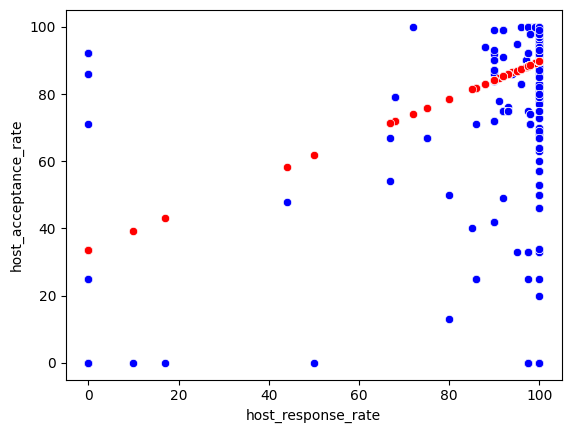

In [321]:
# Visualizamos la gráfica comparativa entre el total real y el total predecido
sns.scatterplot(x = 'host_response_rate', y = 'host_acceptance_rate', color = 'blue', data = dfHome2)
sns.scatterplot(x = 'host_response_rate', y = 'Predict1', color = "red", data = dfHome2)

In [322]:
# Coeficiente de determinación de nuestro modelo (R cuadrada)
coef_Deter_0 = model.score(X = Vars_Indep, y = Var_Dep)
coef_Deter_0

0.17754050910163632

In [323]:
# Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl_0 = np.sqrt(coef_Deter_0)
coef_Correl_0

0.42135556137499397

## Filtro: “host_acceptance_rate vs price”

<Axes: xlabel='price', ylabel='host_acceptance_rate'>

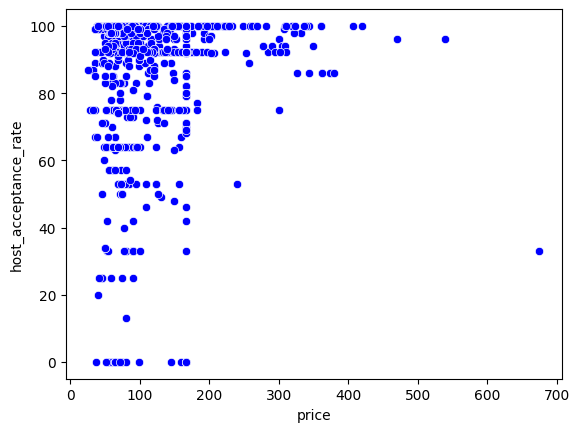

In [324]:
# Imprimimos el scatterplot entre la variable dependiente e independiente
from turtle import color

sns.scatterplot(x = 'price', y = 'host_acceptance_rate', color = 'blue', data = dfHome2)

In [325]:
# Declaramos las variables dependientes e independientes de la regresión lineal
Vars_Indep = dfHome2[["price"]]
Var_Dep = dfHome2[["host_acceptance_rate"]]

In [326]:
# Se define model con la función de regresión Lineal
from sklearn.linear_model import LinearRegression
model = LinearRegression()
# Ajustamos el modelo con las variables declaradas
model.fit(X = Vars_Indep, y = Var_Dep)
# Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['price'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([[0.0247629]]),
 'rank_': 1,
 'singular_': array([2155.51856231]),
 'intercept_': array([84.94781814])}

## Modelo matemático: y = 0.0247629x + 84.94781814

In [327]:
# Predecimos los valores de "host_acceptance_rate" a partir de la variable "price"
y_pred = model.predict(X = dfHome2[['price']])
y_pred
# Insertamos la columna de preddiciones en el df
dfHome2.insert(8, 'Predict2', y_pred)
dfHome2

,room_type_num,host_acceptance_rate,Predict1,host_response_rate,review_scores_location,review_scores_cleanliness,price,availability_365,Predict2,number_of_reviews,reviews_per_month,review_scores_communication,number_of_reviews_ltm
1,2,98.0,88.647655,98.0,5.0,5.0,76.0,337,86.829799,196.0,1.16,5.0,15
9,2,100.0,89.769349,100.0,5.0,5.0,52.0,43,86.235489,76.0,0.62,5.0,1
10,2,97.0,89.769349,100.0,5.0,5.0,67.0,235,86.606933,377.0,2.45,5.0,46
11,2,98.0,88.647655,98.0,5.0,5.0,69.0,334,86.656458,278.0,1.81,5.0,28
24,2,98.0,89.769349,100.0,5.0,5.0,144.0,94,88.513676,63.0,5.76,5.0,44
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6424,2,100.0,89.769349,100.0,5.0,5.0,68.0,53,86.631696,0.0,1.78,5.0,0
6425,2,100.0,89.769349,100.0,5.0,5.0,55.0,244,86.309778,0.0,1.78,5.0,0
6436,2,98.0,89.769349,100.0,5.0,5.0,59.0,88,86.408829,0.0,1.78,5.0,0
6438,2,99.0,89.769349,100.0,5.0,5.0,82.0,26,86.978376,0.0,1.78,5.0,0


<Axes: xlabel='price', ylabel='host_acceptance_rate'>

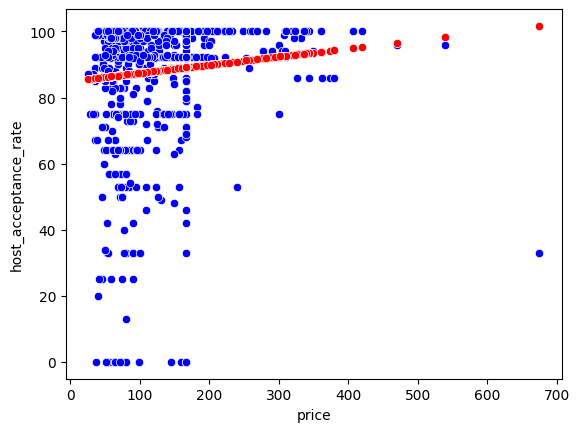

In [328]:
# Gráfica de comparación
sns.scatterplot(x = 'price', y = 'host_acceptance_rate', color = 'blue', data = dfHome2)
sns.scatterplot(x = 'price', y = 'Predict2', color = "red", data = dfHome2)

In [329]:
# Coeficiente de determinación de nuestro modelo (R cuadrada)
coef_Deter_1 = model.score(X = Vars_Indep, y = Var_Dep)
coef_Deter_1

0.0063582150423336925

In [330]:
# Corroboramos el coeficiente de correlación de nuestro modelo
coef_Correl_1 = np.sqrt(coef_Deter_1)
coef_Correl_1

0.07973841635205513

## Filtro: “host_acceptance_rate vs number_of_reviews”

<Axes: xlabel='number_of_reviews', ylabel='host_acceptance_rate'>

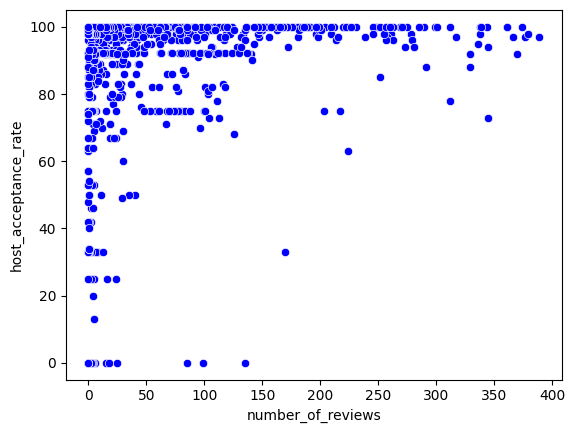

In [331]:
# Imprimimos el scatterplot entre la variable dependiente e independiente
from turtle import color

sns.scatterplot(x = 'number_of_reviews', y = 'host_acceptance_rate', color = 'blue', data = dfHome2)

In [332]:
# Declaramos las variables dependientes e independientes de la regresión lineal
Vars_Indep = dfHome2[["number_of_reviews"]]
Var_Dep = dfHome2[["host_acceptance_rate"]]

In [333]:
# Se define model con la función de regresión Lineal
from sklearn.linear_model import LinearRegression
model = LinearRegression()
# Ajustamos el modelo con las variables declaradas
model.fit(X = Vars_Indep, y = Var_Dep)
# Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['number_of_reviews'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([[0.05659016]]),
 'rank_': 1,
 'singular_': array([2412.01335421]),
 'intercept_': array([84.83665623])}

## Modelo matemático y = 0.05659016x + 84.83665623

In [334]:
# Predecimos los valores de "host_acceptance_rate" a partir de la variable "number_of_reviews"
y_pred = model.predict(X = dfHome2[['number_of_reviews']])
y_pred
# Insertamos la columna de preddiciones en el df
dfHome2.insert(1, 'Predict3', y_pred)
dfHome2

,room_type_num,Predict3,host_acceptance_rate,Predict1,host_response_rate,review_scores_location,review_scores_cleanliness,price,availability_365,Predict2,number_of_reviews,reviews_per_month,review_scores_communication,number_of_reviews_ltm
1,2,95.928327,98.0,88.647655,98.0,5.0,5.0,76.0,337,86.829799,196.0,1.16,5.0,15
9,2,89.137508,100.0,89.769349,100.0,5.0,5.0,52.0,43,86.235489,76.0,0.62,5.0,1
10,2,106.171145,97.0,89.769349,100.0,5.0,5.0,67.0,235,86.606933,377.0,2.45,5.0,46
11,2,100.568719,98.0,88.647655,98.0,5.0,5.0,69.0,334,86.656458,278.0,1.81,5.0,28
24,2,88.401836,98.0,89.769349,100.0,5.0,5.0,144.0,94,88.513676,63.0,5.76,5.0,44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6424,2,84.836656,100.0,89.769349,100.0,5.0,5.0,68.0,53,86.631696,0.0,1.78,5.0,0
6425,2,84.836656,100.0,89.769349,100.0,5.0,5.0,55.0,244,86.309778,0.0,1.78,5.0,0
6436,2,84.836656,98.0,89.769349,100.0,5.0,5.0,59.0,88,86.408829,0.0,1.78,5.0,0
6438,2,84.836656,99.0,89.769349,100.0,5.0,5.0,82.0,26,86.978376,0.0,1.78,5.0,0


<Axes: xlabel='number_of_reviews', ylabel='host_acceptance_rate'>

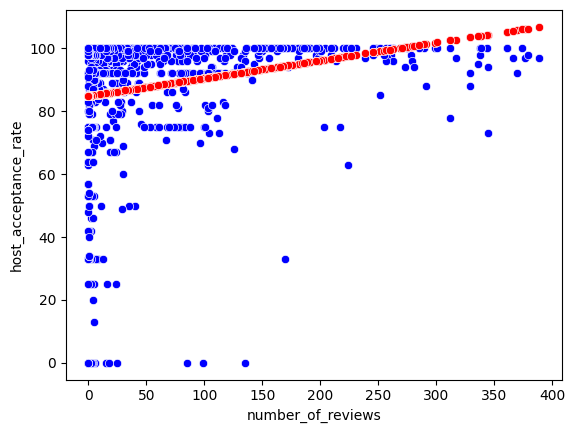

In [335]:
# Gráfica de comparación
sns.scatterplot(x = 'number_of_reviews', y = 'host_acceptance_rate', color = 'blue', data = dfHome2)
sns.scatterplot(x = 'number_of_reviews', y = 'Predict3', color = "red", data = dfHome2)

In [336]:
# Coeficiente de determinación de nuestro modelo (R cuadrada)
coef_Deter_2 = model.score(X = Vars_Indep, y = Var_Dep)
coef_Deter_2

0.041578591379144436

In [337]:
# Corroboramos el coeficiente de correlación de nuestro modelo
coef_Correl_2 = np.sqrt(coef_Deter_2)
coef_Correl_2

0.2039082915899803

## Filtro: “review_scores_location vs review_scores_cleanliness”

<Axes: xlabel='review_scores_cleanliness', ylabel='review_scores_location'>

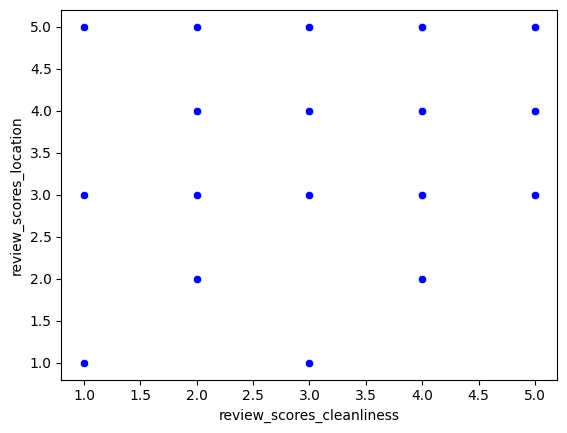

In [338]:
# Imprimimos el scatterplot entre la variable dependiente e independiente
from turtle import color

sns.scatterplot(x = 'review_scores_cleanliness', y = 'review_scores_location', color = 'blue', data = dfHome2)

In [339]:
# Declaramos las variables dependientes e independientes de la regresión lineal
Vars_Indep = dfHome2[["review_scores_cleanliness"]]
Var_Dep = dfHome2[["review_scores_location"]]

In [340]:
# Se define model con la función de regresión Lineal
from sklearn.linear_model import LinearRegression
model = LinearRegression()
# Ajustamos el modelo con las variables declaradas
model.fit(X = Vars_Indep, y = Var_Dep)
# Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['review_scores_cleanliness'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([[0.39135288]]),
 'rank_': 1,
 'singular_': array([16.09153504]),
 'intercept_': array([3.00125211])}

## Modelo Matemático: y = 0.39135288x + 3.00125211

In [341]:
# Predecimos los valores de "review_scores_location" a partir de la variable "review_scores_cleanliness"
y_pred = model.predict(X = dfHome2[['review_scores_cleanliness']])
y_pred
# Insertamos la columna de preddiciones en el df
dfHome2.insert(6, 'Predict4', y_pred)
dfHome2

,room_type_num,Predict3,host_acceptance_rate,Predict1,host_response_rate,review_scores_location,Predict4,review_scores_cleanliness,price,availability_365,Predict2,number_of_reviews,reviews_per_month,review_scores_communication,number_of_reviews_ltm
1,2,95.928327,98.0,88.647655,98.0,5.0,4.958017,5.0,76.0,337,86.829799,196.0,1.16,5.0,15
9,2,89.137508,100.0,89.769349,100.0,5.0,4.958017,5.0,52.0,43,86.235489,76.0,0.62,5.0,1
10,2,106.171145,97.0,89.769349,100.0,5.0,4.958017,5.0,67.0,235,86.606933,377.0,2.45,5.0,46
11,2,100.568719,98.0,88.647655,98.0,5.0,4.958017,5.0,69.0,334,86.656458,278.0,1.81,5.0,28
24,2,88.401836,98.0,89.769349,100.0,5.0,4.958017,5.0,144.0,94,88.513676,63.0,5.76,5.0,44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6424,2,84.836656,100.0,89.769349,100.0,5.0,4.958017,5.0,68.0,53,86.631696,0.0,1.78,5.0,0
6425,2,84.836656,100.0,89.769349,100.0,5.0,4.958017,5.0,55.0,244,86.309778,0.0,1.78,5.0,0
6436,2,84.836656,98.0,89.769349,100.0,5.0,4.958017,5.0,59.0,88,86.408829,0.0,1.78,5.0,0
6438,2,84.836656,99.0,89.769349,100.0,5.0,4.958017,5.0,82.0,26,86.978376,0.0,1.78,5.0,0


<Axes: xlabel='review_scores_cleanliness', ylabel='review_scores_location'>

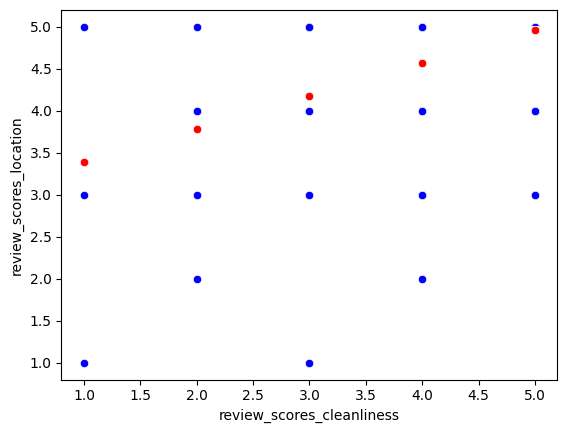

In [342]:
# Gráfica de comparación
sns.scatterplot(x = 'review_scores_cleanliness', y = 'review_scores_location', color = 'blue', data = dfHome2)
sns.scatterplot(x = 'review_scores_cleanliness', y = 'Predict4', color = "red", data = dfHome2)

In [343]:
# Coeficiente de determinación de nuestro modelo (R cuadrada)
coef_Deter_3 = model.score(X = Vars_Indep, y = Var_Dep)
coef_Deter_3

0.2540802854683133

In [344]:
# Corroboramos el coeficiente de correlación de nuestro modelo
coef_Correl_3 = np.sqrt(coef_Deter_3)
coef_Correl_3 # Más cercano al 0 es malo (No hay relación) y más cercano al 1 es bueno (Perfecto)

0.5040637712316898

## Filtro: availability_365 vs number_of_reviews

<Axes: xlabel='number_of_reviews', ylabel='availability_365'>

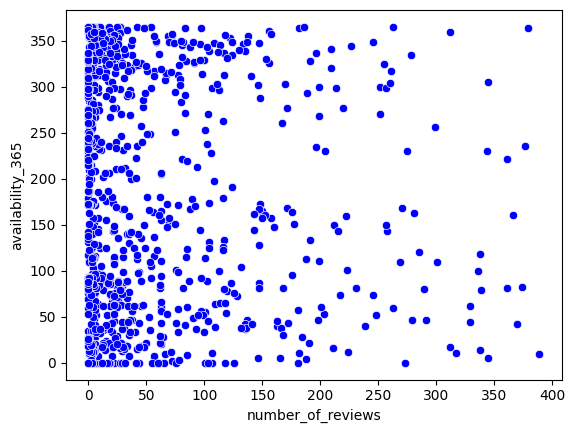

In [345]:
# Imprimimos el scatterplot entre la variable dependiente e independiente
from turtle import color

sns.scatterplot(x = 'number_of_reviews', y = 'availability_365', color = 'blue', data = dfHome2)

In [346]:
# Declaramos las variables dependientes e independientes de la regresión lineal
Vars_Indep = dfHome2[["number_of_reviews"]]
Var_Dep = dfHome2[["availability_365"]]

In [347]:
# Se define model con la función de regresión Lineal
from sklearn.linear_model import LinearRegression
model = LinearRegression()
# Ajustamos el modelo con las variables declaradas
model.fit(X = Vars_Indep, y = Var_Dep)
# Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['number_of_reviews'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([[-0.17762432]]),
 'rank_': 1,
 'singular_': array([2412.01335421]),
 'intercept_': array([198.55424622])}

## Modelo Matemático: y = -0.17762432x + 198.55424622

In [348]:
# Predecimos los valores de "availability_365" a partir de la variable "number_of_reviews"
y_pred = model.predict(X = dfHome2[['number_of_reviews']])
y_pred
# Insertamos la columna de preddiciones en el df
dfHome2.insert(7, 'Predict5', y_pred)
dfHome2

,room_type_num,Predict3,host_acceptance_rate,Predict1,host_response_rate,review_scores_location,Predict4,Predict5,review_scores_cleanliness,price,availability_365,Predict2,number_of_reviews,reviews_per_month,review_scores_communication,number_of_reviews_ltm
1,2,95.928327,98.0,88.647655,98.0,5.0,4.958017,163.739880,5.0,76.0,337,86.829799,196.0,1.16,5.0,15
9,2,89.137508,100.0,89.769349,100.0,5.0,4.958017,185.054798,5.0,52.0,43,86.235489,76.0,0.62,5.0,1
10,2,106.171145,97.0,89.769349,100.0,5.0,4.958017,131.589879,5.0,67.0,235,86.606933,377.0,2.45,5.0,46
11,2,100.568719,98.0,88.647655,98.0,5.0,4.958017,149.174686,5.0,69.0,334,86.656458,278.0,1.81,5.0,28
24,2,88.401836,98.0,89.769349,100.0,5.0,4.958017,187.363914,5.0,144.0,94,88.513676,63.0,5.76,5.0,44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6424,2,84.836656,100.0,89.769349,100.0,5.0,4.958017,198.554246,5.0,68.0,53,86.631696,0.0,1.78,5.0,0
6425,2,84.836656,100.0,89.769349,100.0,5.0,4.958017,198.554246,5.0,55.0,244,86.309778,0.0,1.78,5.0,0
6436,2,84.836656,98.0,89.769349,100.0,5.0,4.958017,198.554246,5.0,59.0,88,86.408829,0.0,1.78,5.0,0
6438,2,84.836656,99.0,89.769349,100.0,5.0,4.958017,198.554246,5.0,82.0,26,86.978376,0.0,1.78,5.0,0


<Axes: xlabel='number_of_reviews', ylabel='availability_365'>

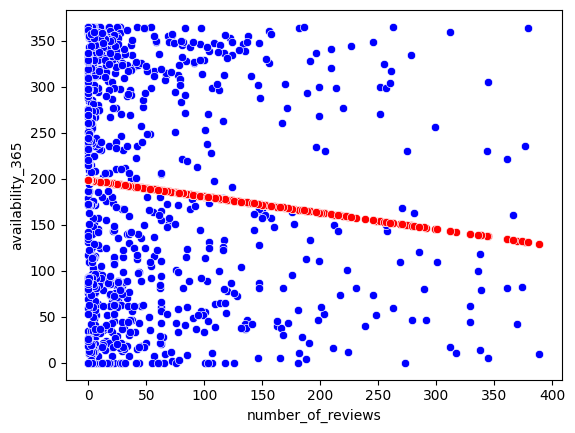

In [349]:
# Gráfica de comparación
sns.scatterplot(x = 'number_of_reviews', y = 'availability_365', color = 'blue', data = dfHome2)
sns.scatterplot(x = 'number_of_reviews', y = 'Predict5', color = "red", data = dfHome2)

In [350]:
# Coeficiente de determinación de nuestro modelo (R cuadrada)
coef_Deter_4 = model.score(X = Vars_Indep, y = Var_Dep)
coef_Deter_4

0.010904867809836016

In [351]:
# Corroboramos el coeficiente de correlación de nuestro modelo
coef_Correl_4 = np.sqrt(coef_Deter_4)
coef_Correl_4

0.10442637506796842

## Filtro: reviews_per_month vs review_scores_communication

<Axes: xlabel='review_scores_communication', ylabel='reviews_per_month'>

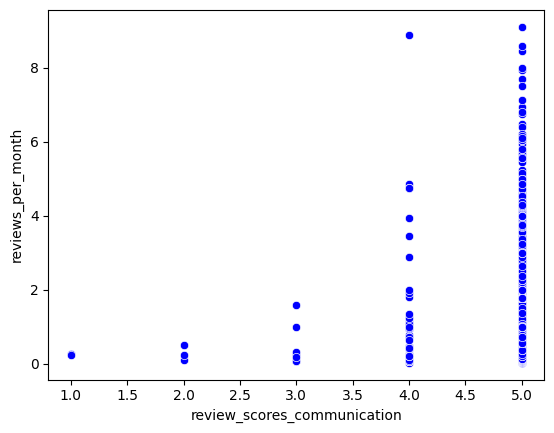

In [352]:
# Imprimimos el scatterplot entre la variable dependiente e independiente
from turtle import color

sns.scatterplot(x = 'review_scores_communication', y = 'reviews_per_month', color = 'blue', data = dfHome2)

In [353]:
# Declaramos las variables dependientes e independientes de la regresión lineal
Vars_Indep = dfHome2[["review_scores_communication"]]
Var_Dep = dfHome2[["reviews_per_month"]]

In [354]:
# Se define model con la función de regresión Lineal
from sklearn.linear_model import LinearRegression
model = LinearRegression()
# Ajustamos el modelo con las variables declaradas
model.fit(X = Vars_Indep, y = Var_Dep)
# Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['review_scores_communication'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([[0.57536625]]),
 'rank_': 1,
 'singular_': array([12.00374291]),
 'intercept_': array([-1.12799048])}

## Modelo Matemático: y = 0.57536625x - 1.12799048

In [355]:
# Predecimos los valores de "reviews_per_month" a partir de la variable "review_scores_communication"
y_pred = model.predict(X = dfHome2[['review_scores_communication']])
y_pred
# Insertamos la columna de preddiciones en el df
dfHome2.insert(13, 'Predict6', y_pred)
dfHome2

,room_type_num,Predict3,host_acceptance_rate,Predict1,host_response_rate,review_scores_location,Predict4,Predict5,review_scores_cleanliness,price,availability_365,Predict2,number_of_reviews,Predict6,reviews_per_month,review_scores_communication,number_of_reviews_ltm
1,2,95.928327,98.0,88.647655,98.0,5.0,4.958017,163.739880,5.0,76.0,337,86.829799,196.0,1.748841,1.16,5.0,15
9,2,89.137508,100.0,89.769349,100.0,5.0,4.958017,185.054798,5.0,52.0,43,86.235489,76.0,1.748841,0.62,5.0,1
10,2,106.171145,97.0,89.769349,100.0,5.0,4.958017,131.589879,5.0,67.0,235,86.606933,377.0,1.748841,2.45,5.0,46
11,2,100.568719,98.0,88.647655,98.0,5.0,4.958017,149.174686,5.0,69.0,334,86.656458,278.0,1.748841,1.81,5.0,28
24,2,88.401836,98.0,89.769349,100.0,5.0,4.958017,187.363914,5.0,144.0,94,88.513676,63.0,1.748841,5.76,5.0,44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6424,2,84.836656,100.0,89.769349,100.0,5.0,4.958017,198.554246,5.0,68.0,53,86.631696,0.0,1.748841,1.78,5.0,0
6425,2,84.836656,100.0,89.769349,100.0,5.0,4.958017,198.554246,5.0,55.0,244,86.309778,0.0,1.748841,1.78,5.0,0
6436,2,84.836656,98.0,89.769349,100.0,5.0,4.958017,198.554246,5.0,59.0,88,86.408829,0.0,1.748841,1.78,5.0,0
6438,2,84.836656,99.0,89.769349,100.0,5.0,4.958017,198.554246,5.0,82.0,26,86.978376,0.0,1.748841,1.78,5.0,0


<Axes: xlabel='review_scores_communication', ylabel='reviews_per_month'>

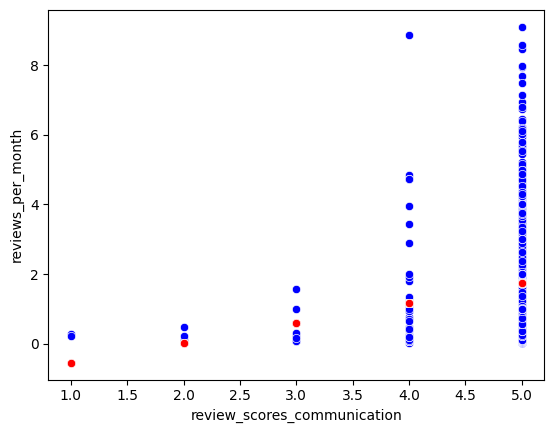

In [356]:
# Gráfica de comparación
sns.scatterplot(x = 'review_scores_communication', y = 'reviews_per_month', color = 'blue', data = dfHome2)
sns.scatterplot(x = 'review_scores_communication', y = 'Predict6', color = "red", data = dfHome2)

In [357]:
# Coeficiente de determinación de nuestro modelo (R cuadrada)
coef_Deter_5 = model.score(X = Vars_Indep, y = Var_Dep)
coef_Deter_5

0.019982596675173436

In [358]:
# Corroboramos el coeficiente de correlación de nuestro modelo
coef_Correl_5 = np.sqrt(coef_Deter_5)
coef_Correl_5 # Más cercano al 0 es malo (No hay relación) y más cercano al 1 es bueno (Perfecto)

0.14135981280114032

## RESUMEN

In [359]:
# Para el tipo de casa "Entire Home/Apt", este fue el resumen de correlaciones:
print(f"Filtro 1: 'host_acceptance_rate vs host_response_rate': {coef_Correl_0}")
print(f"Filtro 2: 'host_acceptance_rate vs price': {coef_Correl_1}")
print(f"Filtro 3: 'host_acceptance_rate vs number_of_reviews': {coef_Correl_2}")
print(f"Filtro 4: 'review_scores_location vs review_scores_cleanliness': {coef_Correl_3}")
print(f"Filtro 5: 'availability_365 vs number_of_reviews': {coef_Correl_4}")
print(f"Filtro 6: 'reviews_per_month vs review_scores_communication': {coef_Correl_5}")

Filtro 1: 'host_acceptance_rate vs host_response_rate': 0.42135556137499397
Filtro 2: 'host_acceptance_rate vs price': 0.07973841635205513
Filtro 3: 'host_acceptance_rate vs number_of_reviews': 0.2039082915899803
Filtro 4: 'review_scores_location vs review_scores_cleanliness': 0.5040637712316898
Filtro 5: 'availability_365 vs number_of_reviews': 0.10442637506796842
Filtro 6: 'reviews_per_month vs review_scores_communication': 0.14135981280114032


## Mejor modelo matemático simple

In [360]:
# Modelo usando las regresiones lineales
dfModel = dfHome2[dfHome2["room_type_num"] == 2]
dfModel = dfModel.drop("room_type_num", axis = 1)
dfModel

,Predict3,host_acceptance_rate,Predict1,host_response_rate,review_scores_location,Predict4,Predict5,review_scores_cleanliness,price,availability_365,Predict2,number_of_reviews,Predict6,reviews_per_month,review_scores_communication,number_of_reviews_ltm
1,95.928327,98.0,88.647655,98.0,5.0,4.958017,163.739880,5.0,76.0,337,86.829799,196.0,1.748841,1.16,5.0,15
9,89.137508,100.0,89.769349,100.0,5.0,4.958017,185.054798,5.0,52.0,43,86.235489,76.0,1.748841,0.62,5.0,1
10,106.171145,97.0,89.769349,100.0,5.0,4.958017,131.589879,5.0,67.0,235,86.606933,377.0,1.748841,2.45,5.0,46
11,100.568719,98.0,88.647655,98.0,5.0,4.958017,149.174686,5.0,69.0,334,86.656458,278.0,1.748841,1.81,5.0,28
24,88.401836,98.0,89.769349,100.0,5.0,4.958017,187.363914,5.0,144.0,94,88.513676,63.0,1.748841,5.76,5.0,44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6424,84.836656,100.0,89.769349,100.0,5.0,4.958017,198.554246,5.0,68.0,53,86.631696,0.0,1.748841,1.78,5.0,0
6425,84.836656,100.0,89.769349,100.0,5.0,4.958017,198.554246,5.0,55.0,244,86.309778,0.0,1.748841,1.78,5.0,0
6436,84.836656,98.0,89.769349,100.0,5.0,4.958017,198.554246,5.0,59.0,88,86.408829,0.0,1.748841,1.78,5.0,0
6438,84.836656,99.0,89.769349,100.0,5.0,4.958017,198.554246,5.0,82.0,26,86.978376,0.0,1.748841,1.78,5.0,0


In [361]:
# Correlación de 'number_of_reviews' con las demás y filtrando las correlaciones fuertes
ReviewsModel = abs(dfModel.corr()['number_of_reviews'])
ReviewsModel = ReviewsModel[ReviewsModel.abs() > 0.2].sort_values(ascending=False).to_frame()
ReviewsModel

,number_of_reviews
Predict5,1.000000
Predict3,1.000000
number_of_reviews,1.000000
number_of_reviews_ltm,0.623585
reviews_per_month,0.457752
host_acceptance_rate,0.203908


<Axes: >

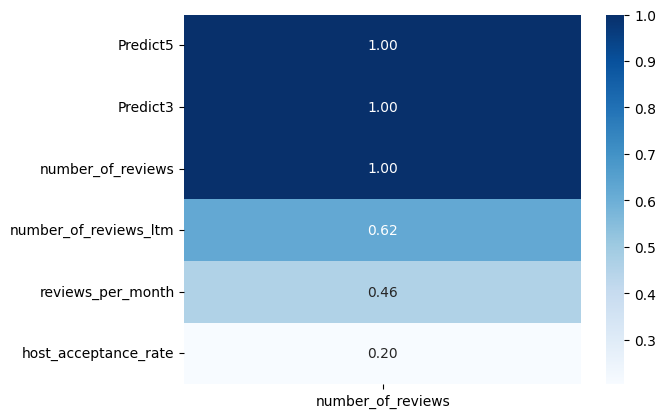

In [362]:
# Gráficamos el mapa de calor de los coeficientes de correlación
Heat_Map1 = sns.heatmap(ReviewsModel, cmap = 'Blues', annot = True, fmt = ".2f")
Heat_Map1

In [363]:
# Modelo original
df = df[df["room_type_num"] == 2]
df = df.drop("room_type_num", axis = 1)
df

# Separamos los datos cuantitativos
dfModel_2 = df.select_dtypes(np.number)
dfModel_2

,host_id,host_since,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_has_profile_pic,host_identity_verified,latitude,longitude,...,number_of_reviews,reviews_per_month,price,beds,amenities_num,neighbourhood_cleansed_num,host_response_time_num,bathroom_text_num,priceMex,neighbourhood_Category_num
1,30559,2009,98.0,98.0,1.0,10,1,1,47.550170,-122.319370,...,196.0,1.16,76.0,1.0,53.0,24,2,5,1486.26,4
9,2438665,2012,100.0,100.0,0.0,4,1,1,47.700850,-122.367000,...,76.0,0.62,52.0,2.0,48.0,14,2,5,1016.91,2
10,209571,2010,100.0,97.0,1.0,1,1,1,47.661330,-122.400880,...,377.0,2.45,67.0,1.0,30.0,36,3,5,1310.25,2
11,30559,2009,98.0,98.0,1.0,10,1,1,47.549710,-122.317530,...,278.0,1.81,69.0,1.0,42.0,24,2,3,1349.36,4
24,1025723,2011,100.0,98.0,1.0,2,1,1,47.600020,-122.327420,...,63.0,5.76,144.0,1.0,39.0,34,3,4,2816.06,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6424,159991679,2017,100.0,100.0,0.0,1,1,0,47.515970,-122.376410,...,0.0,1.78,68.0,1.0,25.0,2,3,5,1329.81,3
6425,28379912,2015,100.0,100.0,0.0,11,1,1,47.676560,-122.326830,...,0.0,1.78,55.0,1.0,46.0,25,2,5,1075.58,3
6436,529119042,2023,100.0,98.0,0.0,35,1,1,47.602287,-122.300789,...,0.0,1.78,59.0,1.0,17.0,42,3,3,1153.80,0
6438,184675574,2018,100.0,99.0,0.0,4,1,1,47.665714,-122.289243,...,0.0,1.78,82.0,1.0,17.0,10,3,5,1603.59,0


In [364]:
# Correlación de 'number_of_reviews' con las demás y filtrando las correlaciones fuertes
ReviewsModel_2 = abs(dfModel_2.corr()['number_of_reviews'])
ReviewsModel_2 = ReviewsModel_2[ReviewsModel_2.abs() > 0.2].sort_values(ascending=False).to_frame()
ReviewsModel_2

,number_of_reviews
number_of_reviews,1.000000
number_of_reviews_ltm,0.623585
reviews_per_month,0.457752
host_is_superhost,0.385836
host_years,0.348255
host_since,0.348255
host_id,0.335030
number_of_reviews_l30d,0.301020
minimum_nights_avg_ntm,0.260342
host_acceptance_rate,0.203908


<Axes: >

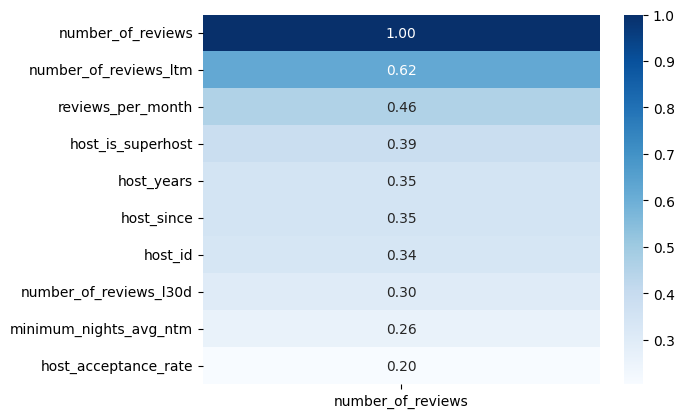

In [365]:
# Gráficamos el mapa de calor de los coeficientes de correlación
Heat_Map2 = sns.heatmap(ReviewsModel_2, cmap = 'Blues', annot = True, fmt = ".2f")
Heat_Map2

<Axes: xlabel='number_of_reviews_ltm', ylabel='number_of_reviews'>

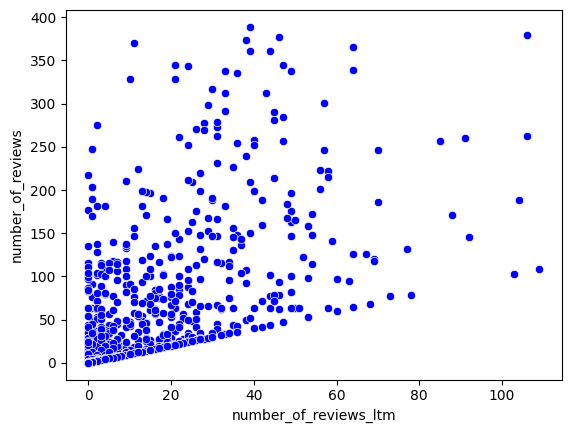

In [366]:
# Para este tipo de habitación "Private Room", el mejor modelo matemático simple que describe de mejor manera el número de reseñas es el siguiente:
from turtle import color
sns.scatterplot(x = 'number_of_reviews_ltm', y = 'number_of_reviews', color = 'blue', data = dfHome2)

In [367]:
# Declaramos las variables dependientes e independientes de la regresión lineal
Vars_Indep = dfHome2[["number_of_reviews_ltm"]]
Var_Dep = dfHome2[["number_of_reviews"]]

In [368]:
model = LinearRegression()
# Ajustamos el modelo con las variables declaradas
model.fit(X = Vars_Indep, y = Var_Dep)
# Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['number_of_reviews_ltm'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([[2.71105993]]),
 'rank_': 1,
 'singular_': array([554.79961807]),
 'intercept_': array([16.90345372])}

## Modelo Matemático: y = 2.71105993x + 16.90345372

In [369]:
# Predecimos los valores de "number_of_reviews" a partir de la variable "number_of_reviews_ltm"
y_pred = model.predict(X = dfHome2[['number_of_reviews_ltm']])
y_pred
# Insertamos la columna de preddiciones en el df
dfHome2.insert(13, 'PredictFinal', y_pred)
dfHome2

,room_type_num,Predict3,host_acceptance_rate,Predict1,host_response_rate,review_scores_location,Predict4,Predict5,review_scores_cleanliness,price,availability_365,Predict2,number_of_reviews,PredictFinal,Predict6,reviews_per_month,review_scores_communication,number_of_reviews_ltm
1,2,95.928327,98.0,88.647655,98.0,5.0,4.958017,163.739880,5.0,76.0,337,86.829799,196.0,57.569353,1.748841,1.16,5.0,15
9,2,89.137508,100.0,89.769349,100.0,5.0,4.958017,185.054798,5.0,52.0,43,86.235489,76.0,19.614514,1.748841,0.62,5.0,1
10,2,106.171145,97.0,89.769349,100.0,5.0,4.958017,131.589879,5.0,67.0,235,86.606933,377.0,141.612210,1.748841,2.45,5.0,46
11,2,100.568719,98.0,88.647655,98.0,5.0,4.958017,149.174686,5.0,69.0,334,86.656458,278.0,92.813132,1.748841,1.81,5.0,28
24,2,88.401836,98.0,89.769349,100.0,5.0,4.958017,187.363914,5.0,144.0,94,88.513676,63.0,136.190091,1.748841,5.76,5.0,44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6424,2,84.836656,100.0,89.769349,100.0,5.0,4.958017,198.554246,5.0,68.0,53,86.631696,0.0,16.903454,1.748841,1.78,5.0,0
6425,2,84.836656,100.0,89.769349,100.0,5.0,4.958017,198.554246,5.0,55.0,244,86.309778,0.0,16.903454,1.748841,1.78,5.0,0
6436,2,84.836656,98.0,89.769349,100.0,5.0,4.958017,198.554246,5.0,59.0,88,86.408829,0.0,16.903454,1.748841,1.78,5.0,0
6438,2,84.836656,99.0,89.769349,100.0,5.0,4.958017,198.554246,5.0,82.0,26,86.978376,0.0,16.903454,1.748841,1.78,5.0,0


<Axes: xlabel='number_of_reviews_ltm', ylabel='number_of_reviews'>

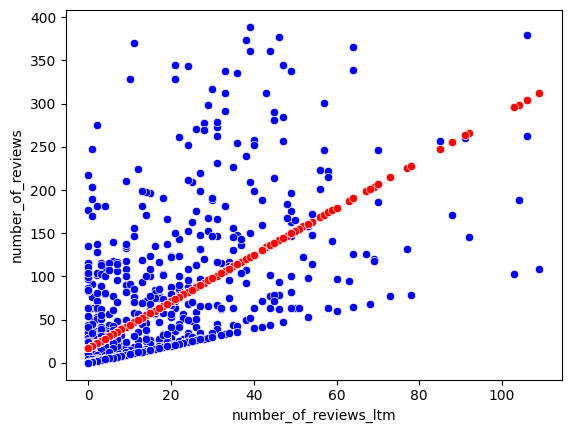

In [370]:
# Gráfica de comparación
sns.scatterplot(x = 'number_of_reviews_ltm', y = 'number_of_reviews', color = 'blue', data = dfHome2)
sns.scatterplot(x = 'number_of_reviews_ltm', y = 'PredictFinal', color = "red", data = dfHome2)

In [371]:
# Coeficiente de determinación de nuestro modelo (R cuadrada)
coefDeterFinal = model.score(X = Vars_Indep, y = Var_Dep)
coefDeterFinal

0.38885807937910255

In [372]:
# Corroboramos el coeficiente de correlación de nuestro modelo
coefCorrelFinal = np.sqrt(coefDeterFinal)
coefCorrelFinal # Más cercano al 0 es malo (No hay relación) y más cercano al 1 es bueno (Perfecto)

0.6235848614094978